# Análisis de Clustering


In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
import numpy as np
import pyclustertend 
import sklearn
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch

**Lectura del archivo**


In [3]:
df_pca = pd.read_csv('pca_resultados.csv')
print(df_pca.head())

             PC1           PC2          PC3           PC4          PC5  \
0   88055.430665 -31300.220912  3454.229085   9126.560635  6797.300332   
1   76642.582817 -27293.396781  2985.442695   8167.173063  5903.582443   
2   94376.076157 -33539.742107  3713.920410   9700.610671  7354.133876   
3   59051.415613 -20990.564879  2341.064856   6535.915068  4411.060605   
4  105659.315090 -37555.996401  4145.780902  10763.542244  8350.751015   

            PC6          PC7           PC8         PC9          PC10  \
0  16901.525492  2651.200159 -10122.247249  520.986183 -21098.418538   
1  14806.532365  2339.237854  -8635.524239  350.733722 -18325.651586   
2  18109.964458  2836.707950 -10841.613631  585.551458 -22606.176706   
3  11465.010401  1735.428711  -6895.582676  179.314255 -14322.792874   
4  20257.415686  3154.721473 -12033.651843  715.097937 -25258.670634   

          PC11          PC12          PC13         PC14          PC15  Id  \
0  6589.802849 -12390.954523 -11926.719510  7

**Cantidad de observaciones**


In [4]:
print(f'Total de observaciones: {df_pca.shape[0]}')

Total de observaciones: 1460


**Estadístico de Hopkins**


In [8]:
X = df_pca.drop(columns=['Id', 'SalePrice']).values

X_scale = sklearn.preprocessing.scale(X)

random.seed(123)
hopkins_stat = pyclustertend.hopkins(X_scale, len(X_scale))
print(f'Estadística de Hopkins: {hopkins_stat:.4f}')

if hopkins_stat == 0.5:
    print("No hay tendencia clara a formar clusters.")
else:
    print("Hay fuerte tendencia a formar clusters.")

Estadística de Hopkins: 0.0063
Hay fuerte tendencia a formar clusters.


**Análisis VAT**


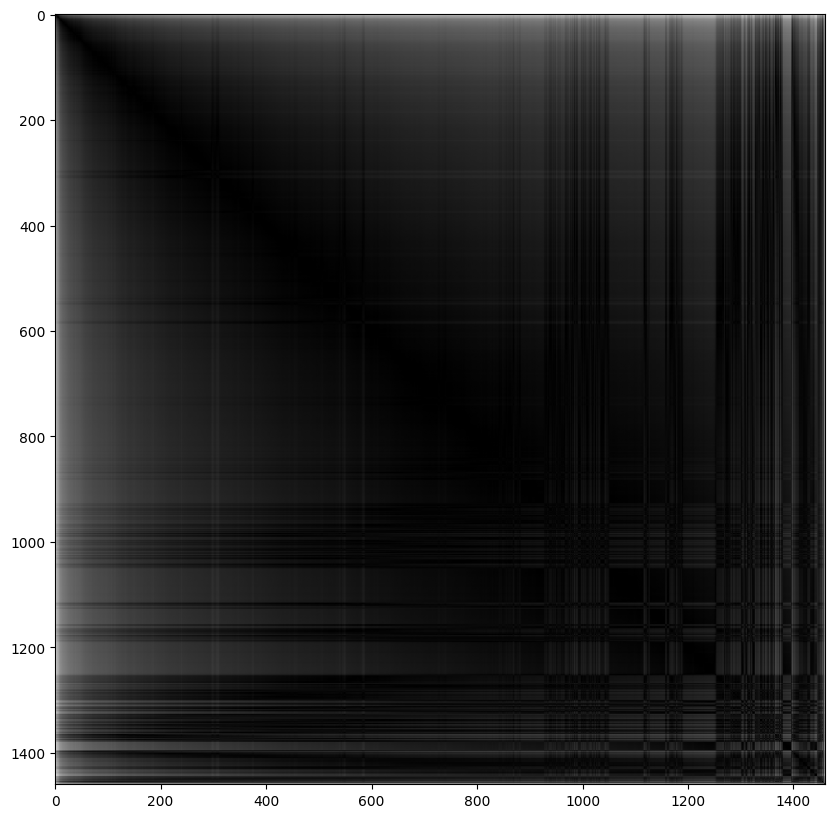

In [7]:
pyclustertend.vat(X_scale)

### Número de k clusters


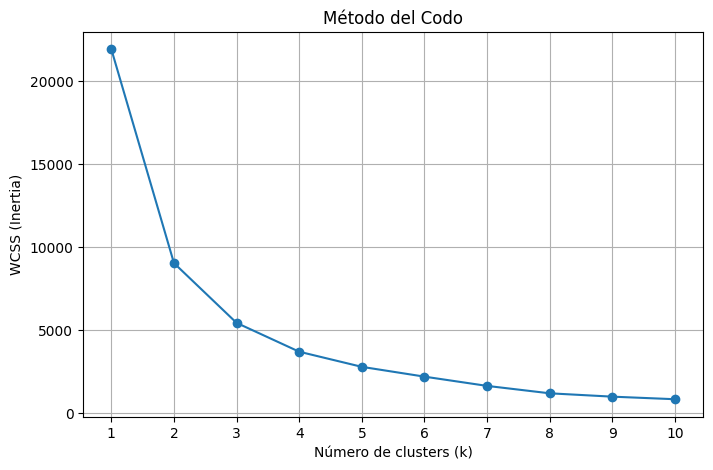

In [11]:
wcss = []
numeroClusters = range(1, 11)

for k in numeroClusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scale)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(numeroClusters, wcss, marker='o')
plt.xticks(numeroClusters)
plt.xlabel("Número de clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Método del Codo")
plt.grid(True)
plt.show()

### K-means


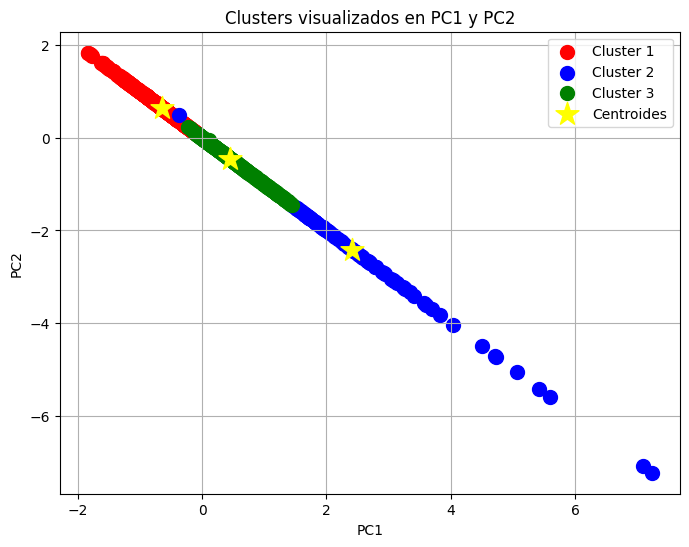

In [ ]:
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
kmeans.fit(X_scale)

df_pca['Cluster'] = kmeans.predict(X_scale)

colores = ['red', 'blue', 'green']
etiquetas = ['Cluster 1', 'Cluster 2', 'Cluster 3']

plt.figure(figsize=(8, 6))
for cluster_id in range(3):
    plt.scatter(
        df_pca[df_pca['Cluster'] == cluster_id]['PC1'],
        df_pca[df_pca['Cluster'] == cluster_id]['PC2'],
        label=etiquetas[cluster_id],
        s=60,
        c=colores[cluster_id],
        edgecolor='k'
    )
plt.xlabel('PC1 (20.7% Varianza)')
plt.ylabel('PC2 (8.5% Varianza)')
plt.title('Clusters - PC1 vs PC2')
plt.legend()
plt.grid(True)
plt.show()

# Graficar PC1 vs PC3
plt.figure(figsize=(8, 6))
for cluster_id in range(3):
    plt.scatter(
        df_pca[df_pca['Cluster'] == cluster_id]['PC1'],
        df_pca[df_pca['Cluster'] == cluster_id]['PC3'],
        label=etiquetas[cluster_id],
        s=60,
        c=colores[cluster_id],
        edgecolor='k'
    )
plt.xlabel('PC1 (20.7% Varianza)')
plt.ylabel('PC3 (6.1% Varianza)')
plt.title('Clusters - PC1 vs PC3')
plt.legend()
plt.grid(True)
plt.show()

# Graficar PC2 vs PC3
plt.figure(figsize=(8, 6))
for cluster_id in range(3):
    plt.scatter(
        df_pca[df_pca['Cluster'] == cluster_id]['PC2'],
        df_pca[df_pca['Cluster'] == cluster_id]['PC3'],
        label=etiquetas[cluster_id],
        s=60,
        c=colores[cluster_id],
        edgecolor='k'
    )
plt.xlabel('PC2 (8.5% Varianza)')
plt.ylabel('PC3 (6.1% Varianza)')
plt.title('Clusters - PC2 vs PC3')
plt.legend()
plt.grid(True)
plt.show()


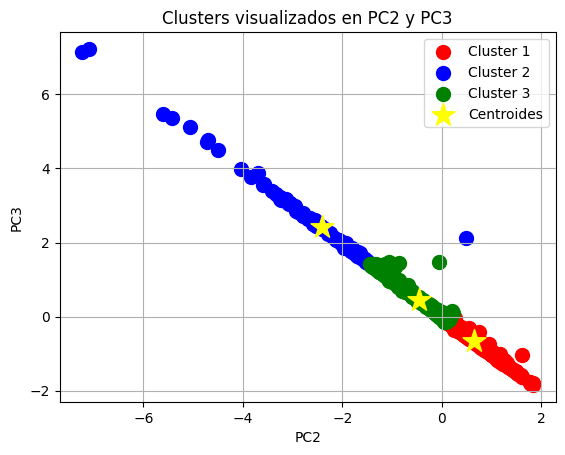

In [21]:
plt.scatter(X_scale[df_pca['Cluster'] == 0, 1], X_scale[df_pca['Cluster'] == 0, 2], s=100, c='red', label="Cluster 1")
plt.scatter(X_scale[df_pca['Cluster'] == 1, 1], X_scale[df_pca['Cluster'] == 1, 2], s=100, c='blue', label="Cluster 2")
plt.scatter(X_scale[df_pca['Cluster'] == 2, 1], X_scale[df_pca['Cluster'] == 2, 2], s=100, c='green', label="Cluster 3")

plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s=300, c="yellow", marker="*", label="Centroides")

plt.title("Clusters visualizados en PC2 y PC3")
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
print(df_pca.groupby('Cluster').mean())

                   PC1           PC2          PC3           PC4           PC5  \
Cluster                                                                         
0         54725.345499 -19498.377689  2119.308968   6123.046045   3945.036209   
1        157477.378807 -55897.627090  6303.548873  15491.286169  12858.569334   
2         91410.686686 -32496.323366  3616.169761   9460.687834   7129.316791   

                  PC6          PC7           PC8          PC9          PC10  \
Cluster                                                                       
0        10601.060351  1714.735552  -6278.402310   147.569368 -13171.516071   
1        30120.082745  4716.389207 -17958.024759  1381.895176 -37604.379400   
2        17567.971686  2782.392205 -10441.816132   569.670345 -21877.511799   

                 PC11          PC12          PC13          PC14          PC15  \
Cluster                                                                         
0         4316.416050  -7738.609463 

### Clustering Jerárquico


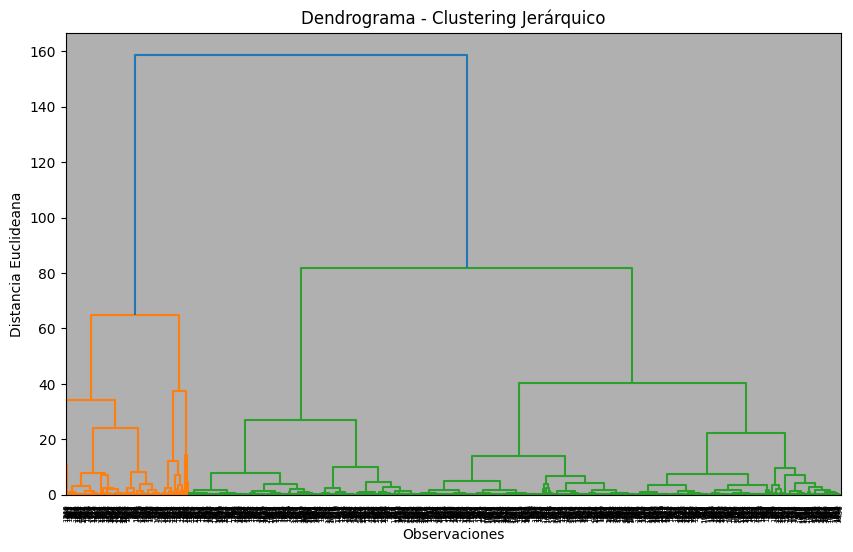

In [15]:
plt.figure(figsize=(10,6))
dendrograma = sch.dendrogram(sch.linkage(X_scale, method='ward'))
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Observaciones")
plt.ylabel("Distancia Euclideana")
plt.grid(True)
plt.show()